In [1]:

import torch
import scanpy as sc
import pandas as pd
import scipy.sparse as sp
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scvi
from skmisc.loess import loess
import seaborn as sns
from scvi.model import SCVI
#import torchmetrics
#import pytorch_lightning

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_mtx from `annda

In [5]:
adata_all = sc.read_h5ad("updated_adata_all_rawCounts.h5ad")

In [8]:
adata_all.obs

,sample_id,region,brain_region,batch,donor_id,braak_stage,sex,age,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log1p_total_counts_mt,n_genes
GSM4432645_GSM4432645_AAACCTGAGGATGCGT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,4620,11301.0,850.0,7.521458,8.438366,9.332735,19.653128,25.546412,32.952836,46.243695,6.746412,4620
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,2562,4558.0,17.0,0.372971,7.848934,8.424859,19.197016,25.756911,34.510750,49.846424,2.890372,2562
GSM4432645_GSM4432645_AAACCTGCAAGTAGTA-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,484,634.0,42.0,6.624606,6.184149,6.453625,29.179811,39.432177,55.205047,100.000000,3.761200,484
GSM4432645_GSM4432645_AAACCTGCAGACGTAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,244,305.0,21.0,6.885246,5.501258,5.723585,36.393443,52.786885,85.573770,100.000000,3.091043,244
GSM4432645_GSM4432645_AAACCTGCATACTCTT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,3068,6162.0,193.0,3.132100,8.029433,8.726481,18.822002,25.799124,34.252799,50.024339,5.267858,3069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,292,363.0,5.0,1.377410,5.680173,5.897154,33.333333,47.107438,74.655647,100.000000,1.791759,292
GSM4432654_GSM4432654_TTTGTCATCGCGGATC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,498,698.0,3.0,0.429799,6.212606,6.549651,33.524355,42.979943,57.306590,100.000000,1.386294,498
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,392,443.0,6.0,1.354402,5.976351,6.098074,22.747748,34.009009,56.531532,100.000000,1.945910,393
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,470,600.0,40.0,6.666667,6.154858,6.398595,27.166667,38.333333,55.000000,100.000000,3.713572,470


In [9]:
# solo_scvi_utils.py
"""Utility helpers for running SOLO doublet detection with a batch‑aware SCVI model
on *multiple* biological samples contained in a single AnnData object.

The main entry point is :func:`run_solo_scvi_per_sample`, which iterates over the
unique values in ``adata.obs[sample_key]``, builds an SCVI model for each sample,
trains a SOLO classifier on the learned latent space, and writes the predicted
probabilities/labels back into ``adata.obs`` (columns ``solo_doublet`` and
``solo_singlet``).

Example
-------
>>> import scanpy as sc, solo_scvi_utils as su
>>> adata_all = sc.read_h5ad("/path/to/adata_all.h5ad")
>>> # Option A – raw counts live in adata.X
>>> adata_all = su.run_solo_scvi_per_sample(adata_all,
...                                         sample_key="sample_id",
...                                         batch_key="lane")
>>> # Option B – raw counts are stored in a layer named "counts"
>>> adata_all = su.run_solo_scvi_per_sample(adata_all,
...                                         sample_key="sample_id",
...                                         counts_layer="counts",
...                                         batch_key="lane")
"""

from __future__ import annotations

import warnings
from typing import Optional, Sequence

import pandas as pd
import scvi
import torch
from anndata import AnnData

__all__: Sequence[str] = [
    "run_solo_scvi_per_sample",
]


def _select_device(use_gpu: bool = True) -> tuple[str, Optional[int]]:
    """Return accelerator string and device count based on CUDA availability."""
    cuda_ok = torch.cuda.is_available()
    if use_gpu and cuda_ok:
        return "gpu", 1
    if use_gpu and not cuda_ok:
        warnings.warn("GPU requested but no CUDA device found; falling back to CPU")
    return "cpu", None


def run_solo_scvi_per_sample(
    adata: AnnData,
    *,
    sample_key: str = "sample_id",
    counts_layer: Optional[str] = None,
    batch_key: Optional[str] = None,
    max_epochs_vae: int = 20,
    max_epochs_solo: int = 15,
    batch_size: int = 256,
    use_gpu: bool = True,
) -> AnnData:
    """Run SOLO doublet detection **per biological sample**.

    Parameters
    ----------
    adata
        AnnData object that contains all samples together.
    sample_key
        Column in ``adata.obs`` that identifies each biological sample.
    counts_layer
        Name of the layer holding *raw integer counts.*  If *None*, the matrix
        in ``adata.X`` is passed to SCVI.  When a string is given, the layer
        **must** exist in *every* per‑sample slice, otherwise a
        :class:`ValueError` is raised.
    batch_key
        Optional column in ``adata.obs`` that encodes technical batches (e.g.
        10X lanes or chemistry versions) *within* each sample.  If provided,
        SCVI learns a batch‑aware latent space.  SOLO is still run once per
        sample because the simulated doublets must share the same barcode
        universe.
    max_epochs_vae, max_epochs_solo
        Training epochs for the VAE and the SOLO classifier, respectively.
    batch_size
        Mini‑batch size for both training phases.
    use_gpu
        Whether to attempt using GPU acceleration (CUDA).  Falls back to CPU if
        unavailable.

    Returns
    -------
    AnnData
        ``adata`` with two additional columns in ``.obs``:
        ``solo_doublet`` (bool) and ``solo_singlet`` (float – probability of
        being a singlet).
    """

    # sanity checks ---------------------------------------------------------
    if sample_key not in adata.obs:
        raise KeyError(f"'{sample_key}' not found in adata.obs")

    if counts_layer is not None and counts_layer not in adata.layers:
        raise KeyError(
            f"Requested counts_layer='{counts_layer}', but it is not present in adata.layers."
        )

    accelerator, devices = _select_device(use_gpu)

    all_preds = []

    for sample in adata.obs[sample_key].unique():
        print(f"🧪 Processing sample: {sample}")
        ad = adata[adata.obs[sample_key] == sample].copy()

        # register the AnnData object with scvi‑tools -----------------------
        scvi.model.SCVI.setup_anndata(
            ad,
            layer=counts_layer,
            batch_key=batch_key,
        )

        # train the VAE -----------------------------------------------------
        vae = scvi.model.SCVI(ad)
        vae.train(
            accelerator=accelerator,
            devices=devices,
            max_epochs=max_epochs_vae,
            batch_size=batch_size,
        )

        # train SOLO on the learnt latent space ----------------------------
        solo = scvi.external.SOLO.from_scvi_model(vae)
        solo.train(
            accelerator=accelerator,
            devices=devices,
            max_epochs=max_epochs_solo,
            batch_size=batch_size,
        )

        # gather predictions ----------------------------------------------
        preds = solo.predict()
        preds.index = ad.obs_names  # preserve original barcodes
        all_preds.append(preds)

    # concatenate predictions from all samples -----------------------------
    df = pd.concat(all_preds, axis=0).loc[adata.obs_names]

    # write back into the original object ----------------------------------
    adata.obs["solo_doublet"] = (df["doublet"].astype(float) > 0.5)
    adata.obs["solo_singlet"] = df["singlet"].astype(float)

    return adata


In [17]:
import scanpy as sc
#from solo_scvi_utils import run_solo_scvi_per_sample

# 3. Run doublet detection
adata_all = run_solo_scvi_per_sample(
    adata_all,
    sample_key="sample_id",      # column with your 10 sample IDs
    counts_layer=None,           # or "counts" if you added the layer above
    batch_key=None,            # set to None if there is no within-sample batch
    max_epochs_vae=50,
    max_epochs_solo=30,
    batch_size=256,
    use_gpu=True,                # falls back to CPU if CUDA isn’t available
)

# 4. Inspect results
print(adata_all.obs[["sample_id", "solo_doublet", "solo_singlet"]].head())


🧪 Processing sample: GSM4432645


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432646


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


🧪 Processing sample: GSM4432647


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432648


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432649


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432650


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
GPU available: True (cuda), used: True


🧪 Processing sample: GSM4432651


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432652


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432653


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


🧪 Processing sample: GSM4432654


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


                                                     sample_id  solo_doublet  \
GSM4432645_GSM4432645_AAACCTGAGGATGCGT-1_GSM443...  GSM4432645          True   
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...  GSM4432645          True   
GSM4432645_GSM4432645_AAACCTGCAAGTAGTA-1_GSM443...  GSM4432645          True   
GSM4432645_GSM4432645_AAACCTGCAGACGTAG-1_GSM443...  GSM4432645         False   
GSM4432645_GSM4432645_AAACCTGCATACTCTT-1_GSM443...  GSM4432645          True   

                                                    solo_singlet  
GSM4432645_GSM4432645_AAACCTGAGGATGCGT-1_GSM443...      0.199106  
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...      0.289714  
GSM4432645_GSM4432645_AAACCTGCAAGTAGTA-1_GSM443...      0.158051  
GSM4432645_GSM4432645_AAACCTGCAGACGTAG-1_GSM443...      0.975610  
GSM4432645_GSM4432645_AAACCTGCATACTCTT-1_GSM443...      0.235072  


In [14]:
adata_all.obs

,sample_id,region,brain_region,batch,donor_id,braak_stage,sex,age,n_genes_by_counts,total_counts,...,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log1p_total_counts_mt,n_genes,solo_doublet,solo_singlet
GSM4432645_GSM4432645_AAACCTGAGGATGCGT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,4620,11301.0,...,8.438366,9.332735,19.653128,25.546412,32.952836,46.243695,6.746412,4620,True,0.158653
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,2562,4558.0,...,7.848934,8.424859,19.197016,25.756911,34.510750,49.846424,2.890372,2562,True,0.281851
GSM4432645_GSM4432645_AAACCTGCAAGTAGTA-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,484,634.0,...,6.184149,6.453625,29.179811,39.432177,55.205047,100.000000,3.761200,484,True,0.104175
GSM4432645_GSM4432645_AAACCTGCAGACGTAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,244,305.0,...,5.501258,5.723585,36.393443,52.786885,85.573770,100.000000,3.091043,244,False,0.935855
GSM4432645_GSM4432645_AAACCTGCATACTCTT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,3068,6162.0,...,8.029433,8.726481,18.822002,25.799124,34.252799,50.024339,5.267858,3069,True,0.147409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,292,363.0,...,5.680173,5.897154,33.333333,47.107438,74.655647,100.000000,1.791759,292,False,0.983850
GSM4432654_GSM4432654_TTTGTCATCGCGGATC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,498,698.0,...,6.212606,6.549651,33.524355,42.979943,57.306590,100.000000,1.386294,498,False,0.533096
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,392,443.0,...,5.976351,6.098074,22.747748,34.009009,56.531532,100.000000,1.945910,393,False,0.970260
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,470,600.0,...,6.154858,6.398595,27.166667,38.333333,55.000000,100.000000,3.713572,470,True,0.356403


In [16]:
# 1) overall doublet rate
overall_pct = adata_all.obs["solo_doublet"].mean() * 100
print(f"Overall predicted doublet rate: {overall_pct:.2f}%")

# 2) per-sample doublet rates
pct_per_sample = (
    adata_all.obs
             .groupby("sample_id")["solo_doublet"]
             .mean()           # fraction per sample
             .mul(100)         # convert to %
             .sort_values(ascending=False)
)

# pretty print as “xx.xx%”
print(pct_per_sample.to_string(float_format=lambda x: f"{x:.2f}%"))


Overall predicted doublet rate: 33.33%
sample_id
GSM4432647   55.09%
GSM4432648   42.86%
GSM4432646   40.40%
GSM4432654   39.14%
GSM4432650   38.14%
GSM4432649   37.69%
GSM4432645   35.86%
GSM4432651   27.73%
GSM4432653   21.80%
GSM4432652   20.83%


C:\Users\D_F\AppData\Local\Temp\ipykernel_21428\3585672010.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sample_id")["solo_doublet"]


In [18]:
# 1) overall doublet rate
overall_pct = adata_all.obs["solo_doublet"].mean() * 100
print(f"Overall predicted doublet rate: {overall_pct:.2f}%")

# 2) per-sample doublet rates
pct_per_sample = (
    adata_all.obs
             .groupby("sample_id")["solo_doublet"]
             .mean()           # fraction per sample
             .mul(100)         # convert to %
             .sort_values(ascending=False)
)

# pretty print as “xx.xx%”
print(pct_per_sample.to_string(float_format=lambda x: f"{x:.2f}%"))


Overall predicted doublet rate: 28.82%
sample_id
GSM4432647   38.62%
GSM4432650   36.33%
GSM4432646   34.57%
GSM4432645   31.99%
GSM4432654   31.46%
GSM4432648   30.19%
GSM4432649   24.92%
GSM4432652   23.58%
GSM4432653   23.02%
GSM4432651   18.57%


C:\Users\D_F\AppData\Local\Temp\ipykernel_21428\3585672010.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sample_id")["solo_doublet"]


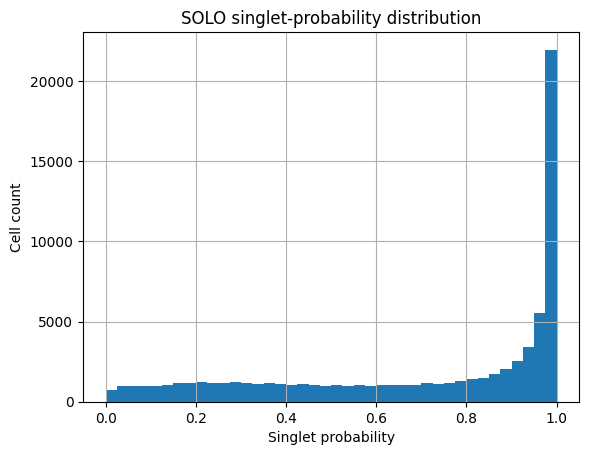

In [19]:
import matplotlib.pyplot as plt
adata_all.obs["solo_singlet"].hist(bins=40)
plt.xlabel("Singlet probability")
plt.ylabel("Cell count")
plt.title("SOLO singlet-probability distribution");


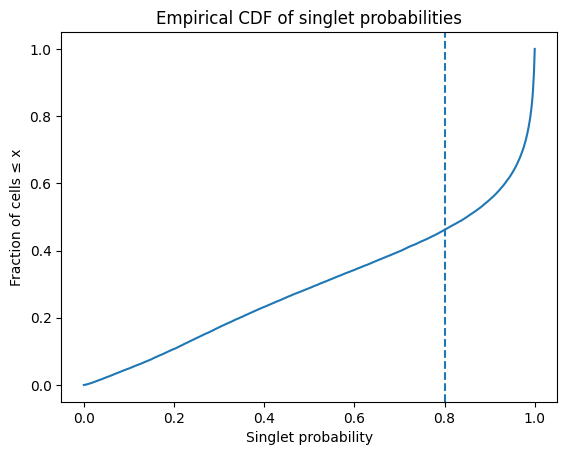

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Grab the probabilities once
p = adata_all.obs["solo_singlet"].values

# 1. Plot the empirical CDF to find the knee ---------------------------
probs_sorted = np.sort(p)
ecdf = np.arange(1, len(p)+1) / len(p)

plt.plot(probs_sorted, ecdf)
plt.axvline(0.80, ls="--")          # a plausible knee
plt.xlabel("Singlet probability")
plt.ylabel("Fraction of cells ≤ x")
plt.title("Empirical CDF of singlet probabilities");


In [23]:
cutoff = 0.75
p_doublet = 1 - adata_all.obs["solo_singlet"]
adata_all.obs["solo_doublet"] = p_doublet > cutoff


In [24]:
# 1) overall doublet rate
overall_pct = adata_all.obs["solo_doublet"].mean() * 100
print(f"Overall predicted doublet rate: {overall_pct:.2f}%")

# 2) per-sample doublet rates
pct_per_sample = (
    adata_all.obs
             .groupby("sample_id")["solo_doublet"]
             .mean()           # fraction per sample
             .mul(100)         # convert to %
             .sort_values(ascending=False)
)

# pretty print as “xx.xx%”
print(pct_per_sample.to_string(float_format=lambda x: f"{x:.2f}%"))


Overall predicted doublet rate: 13.92%
sample_id
GSM4432647   22.22%
GSM4432646   17.19%
GSM4432645   16.76%
GSM4432650   15.55%
GSM4432648   13.84%
GSM4432654   13.30%
GSM4432652   12.19%
GSM4432653   11.76%
GSM4432649   11.54%
GSM4432651    9.19%


C:\Users\D_F\AppData\Local\Temp\ipykernel_21428\3585672010.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sample_id")["solo_doublet"]


In [25]:
adata_all

AnnData object with n_obs × n_vars = 74453 × 26147
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells'

In [26]:
adata_all.write("updated_adata_marked_with_doublets.h5ad", compression="gzip")

# Plots

In [3]:
adata_all = sc.read_h5ad("updated_adata_marked_with_doublets.h5ad")

In [3]:
adata_all.obs

,sample_id,region,brain_region,batch,donor_id,braak_stage,sex,age,n_genes_by_counts,total_counts,...,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log1p_total_counts_mt,n_genes,solo_doublet,solo_singlet
GSM4432645_GSM4432645_AAACCTGAGGATGCGT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,4620,11301.0,...,8.438366,9.332735,19.653128,25.546412,32.952836,46.243695,6.746412,4620,True,0.199106
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,2562,4558.0,...,7.848934,8.424859,19.197016,25.756911,34.510750,49.846424,2.890372,2562,False,0.289714
GSM4432645_GSM4432645_AAACCTGCAAGTAGTA-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,484,634.0,...,6.184149,6.453625,29.179811,39.432177,55.205047,100.000000,3.761200,484,True,0.158051
GSM4432645_GSM4432645_AAACCTGCAGACGTAG-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,244,305.0,...,5.501258,5.723585,36.393443,52.786885,85.573770,100.000000,3.091043,244,False,0.975610
GSM4432645_GSM4432645_AAACCTGCATACTCTT-1_GSM4432645,GSM4432645,Entorhinal cortex,Entorhinal cortex,C,2,0,Male,60,3068,6162.0,...,8.029433,8.726481,18.822002,25.799124,34.252799,50.024339,5.267858,3069,True,0.235072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,292,363.0,...,5.680173,5.897154,33.333333,47.107438,74.655647,100.000000,1.791759,292,False,0.994819
GSM4432654_GSM4432654_TTTGTCATCGCGGATC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,498,698.0,...,6.212606,6.549651,33.524355,42.979943,57.306590,100.000000,1.386294,498,False,0.830773
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,392,443.0,...,5.976351,6.098074,22.747748,34.009009,56.531532,100.000000,1.945910,393,False,0.838007
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM4432654,GSM4432654,Entorhinal cortex,Entorhinal cortex,D,10,6,Male,82,470,600.0,...,6.154858,6.398595,27.166667,38.333333,55.000000,100.000000,3.713572,470,False,0.773198


C:\Users\D_F\AppData\Local\Temp\ipykernel_3136\128053058.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_all.obs.groupby("sample_id")["solo_doublet"]


Saved all panels to E:\thesis-folder\scRNAseq_solo\supp_fig_doublets


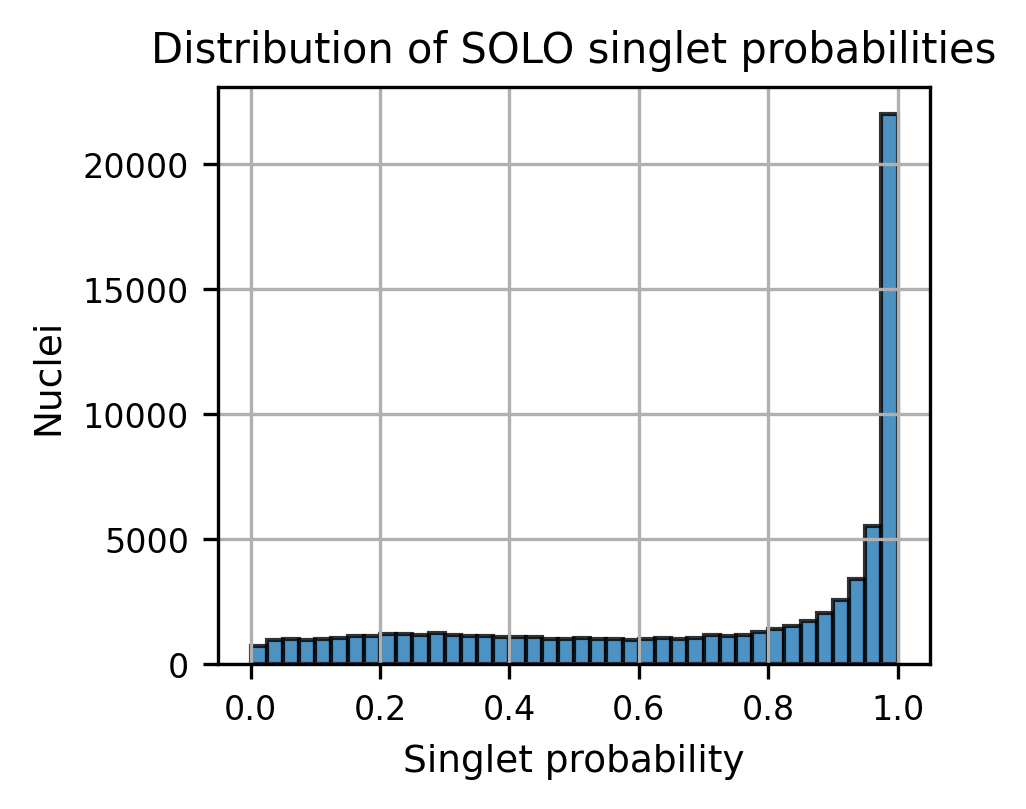

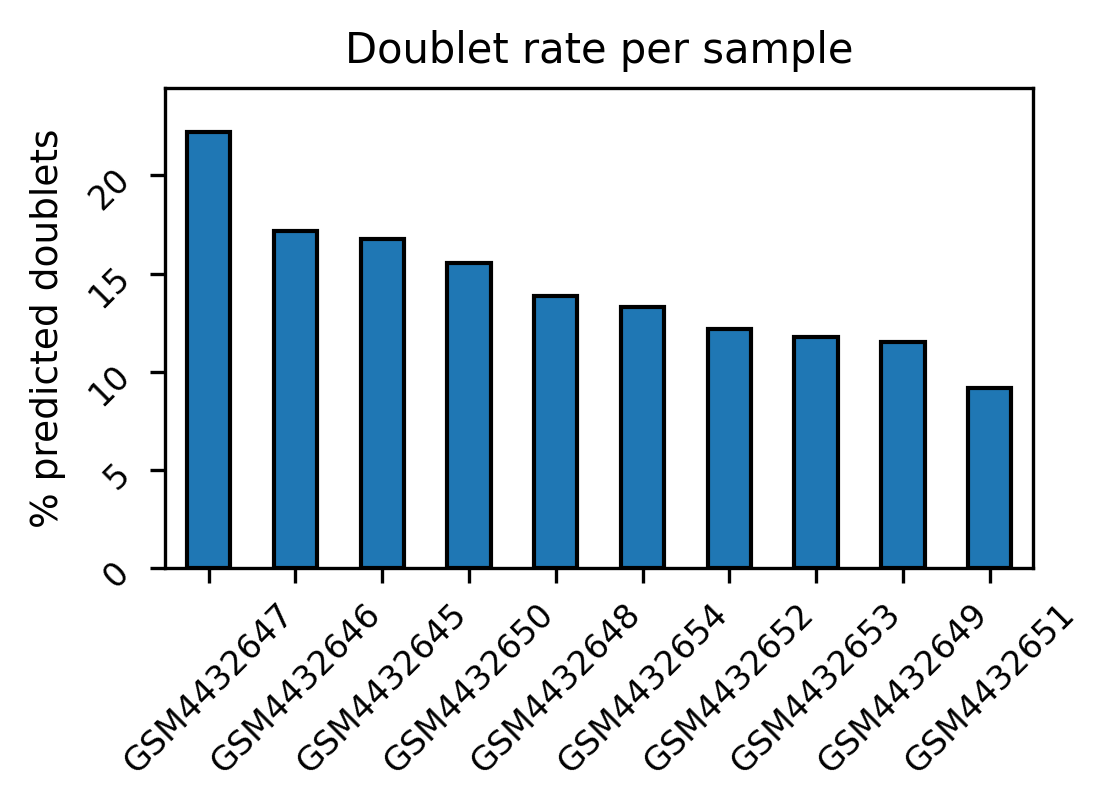

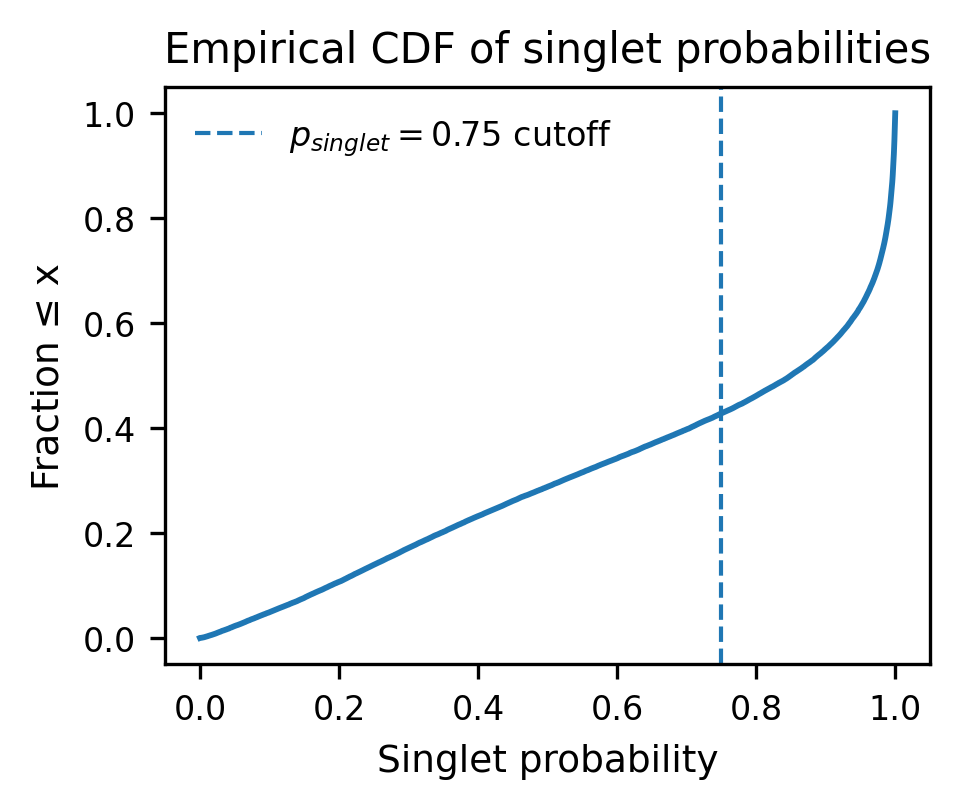

In [4]:
# ---------------------------------------------------------------
# publication-quality plots for Supplementary Figure S1–S3
# ---------------------------------------------------------------
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc


# choose a directory for the PDFs/PNGs
OUTDIR = pathlib.Path("supp_fig_doublets")
OUTDIR.mkdir(exist_ok=True)

# ---------- Panel A: singlet-probability histogram --------------
fig, ax = plt.subplots(figsize=(3.3, 2.8), dpi=300)
adata_all.obs["solo_singlet"].hist(
    ax=ax, bins=40, log=False, alpha=0.8, edgecolor="black"
)
ax.set_xlabel("Singlet probability", fontsize=9)
ax.set_ylabel("Nuclei", fontsize=9)
ax.set_title("Distribution of SOLO singlet probabilities", fontsize=10)
ax.tick_params(axis="both", labelsize=8)
fig.tight_layout()
fig.savefig(OUTDIR / "SFig_doublet_hist.pdf")
fig.savefig(OUTDIR / "SFig_doublet_hist.png", dpi=300)

# ---------- Panel B: per-sample doublet rate barplot -------------
rates = (
    adata_all.obs.groupby("sample_id")["solo_doublet"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)
fig, ax = plt.subplots(figsize=(3.8, 2.8), dpi=300)
rates.plot.bar(ax=ax, edgecolor="black")
ax.set_ylabel("% predicted doublets", fontsize=9)
ax.set_xlabel("")  # sample IDs on x-axis
ax.set_ylim(0, rates.max() * 1.1)
ax.set_title("Doublet rate per sample", fontsize=10)
ax.tick_params(axis="both", labelsize=8, rotation=45)
fig.tight_layout()
fig.savefig(OUTDIR / "SFig_doublet_rates.pdf")
fig.savefig(OUTDIR / "SFig_doublet_rates.png", dpi=300)

# ---------- Panel C: empirical CDF -------------------------------
p = adata_all.obs["solo_singlet"].values
probs_sorted = np.sort(p)
ecdf = np.arange(1, len(p) + 1) / len(p)

fig, ax = plt.subplots(figsize=(3.3, 2.8), dpi=300)
ax.plot(probs_sorted, ecdf, lw=1.4)
ax.axvline(0.75, ls="--", lw=1, label=r"$p_{singlet}=0.75$ cutoff")
ax.set_xlabel("Singlet probability", fontsize=9)
ax.set_ylabel("Fraction ≤ x", fontsize=9)
ax.set_title("Empirical CDF of singlet probabilities", fontsize=10)
ax.legend(frameon=False, fontsize=8)
ax.tick_params(axis="both", labelsize=8)
fig.tight_layout()
fig.savefig(OUTDIR / "SFig_doublet_ecdf.pdf")
fig.savefig(OUTDIR / "SFig_doublet_ecdf.png", dpi=300)


fig.savefig(OUTDIR / "SFig_doublet_umap.pdf")
fig.savefig(OUTDIR / "SFig_doublet_umap.png", dpi=300)
print(f"Saved all panels to {OUTDIR.resolve()}")


C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:72: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


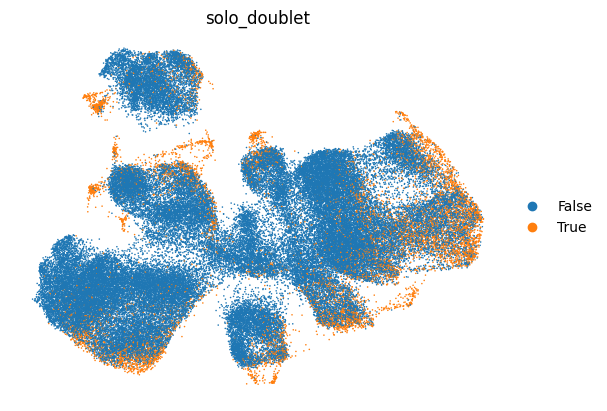

In [6]:
import scanpy as sc

# 0) raw counts should be in adata_all.X (sparse CSR). If they’re in a layer:
# adata_all.X = adata_all.layers["counts"].copy()

# 1) normalise per cell to 10 000 and log-transform
sc.pp.normalize_total(adata_all, target_sum=1e4, inplace=True)
sc.pp.log1p(adata_all)                    # keeps matrix sparse

# 2) pick a smaller gene set (2 000 HVGs instead of 3 000)
sc.pp.highly_variable_genes(
    adata_all, flavor="seurat_v3", n_top_genes=2000, subset=True
)

# 3) PCA on the sparse log matrix, using the memory-efficient solver
sc.tl.pca(adata_all, n_comps=30, svd_solver='arpack', random_state=0)

# 4) build the kNN graph & run UMAP
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=30)   # ← 10 neighbours = less RAM
sc.tl.umap(adata_all, min_dist=0.4)

# 5) plot
sc.pl.umap(adata_all, color="solo_doublet", size=5, frameon=False)


Saved to umap_doublet_panel.pdf / .png


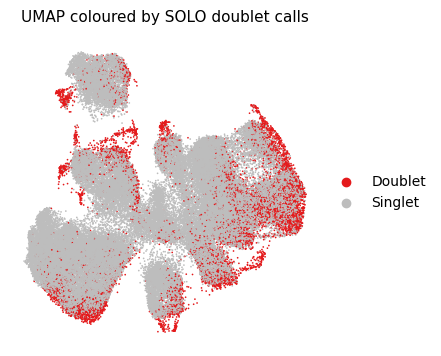

In [8]:
import scanpy as sc
from matplotlib import rcParams

# 0)  Create a categorical column with nicer labels
adata_all.obs["doublet_status"] = adata_all.obs["solo_doublet"].map(
    {True: "Doublet", False: "Singlet"}
).astype("category")

# 1)  Build the kNN/UMAP if it doesn't exist yet
if "X_umap" not in adata_all.obsm:
    # use scVI latent space if present; else PCA space
    sc.pp.neighbors(adata_all, use_rep="X_scVI" if "X_scVI" in adata_all.obsm else None,
                    n_neighbors=15)
    sc.tl.umap(adata_all, min_dist=0.4)

# 2)  Plot – colour singlets grey, doublets red
ax = sc.pl.umap(
    adata_all,
    color="doublet_status",
    palette={"Singlet": "#bdbdbd", "Doublet": "#e41a1c"},  # light-grey & red
    size=6,           # dot size; raise if the plot looks too sparse
    frameon=False,    # drop axes
    legend_loc="right margin",
    show=False,       # keep figure in memory
)

# 3)  Style & save
fig = ax.figure
fig.set_size_inches(4.0, 4.0)                # 4×4-inch square
ax.set_title("UMAP coloured by SOLO doublet calls", fontsize=11, pad=12)

# PDFs are vector – perfect for print
fig.savefig("umap_doublet_panel.pdf", bbox_inches="tight")

# High-resolution raster (600 dpi PNG) if the journal insists on PNG/TIFF
fig.savefig("umap_doublet_panel.png", dpi=600, bbox_inches="tight")

print("Saved to umap_doublet_panel.pdf / .png")


---
## QC‐metric violin plots (singlet vs doublet)

Why include it?
Shows that flagged doublets have, e.g., inflated UMI counts or gene diversity—classic sanity check reviewers expect.

C:\Users\D_F\AppData\Local\Temp\ipykernel_8280\879105539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\D_F\AppData\Local\Temp\ipykernel_8280\879105539.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Singlet", "Doublet"], fontsize=8)
C:\Users\D_F\AppData\Local\Temp\ipykernel_8280\879105539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\D_F\AppData\Local\Temp\ipykernel_8280\879105539.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Singlet"

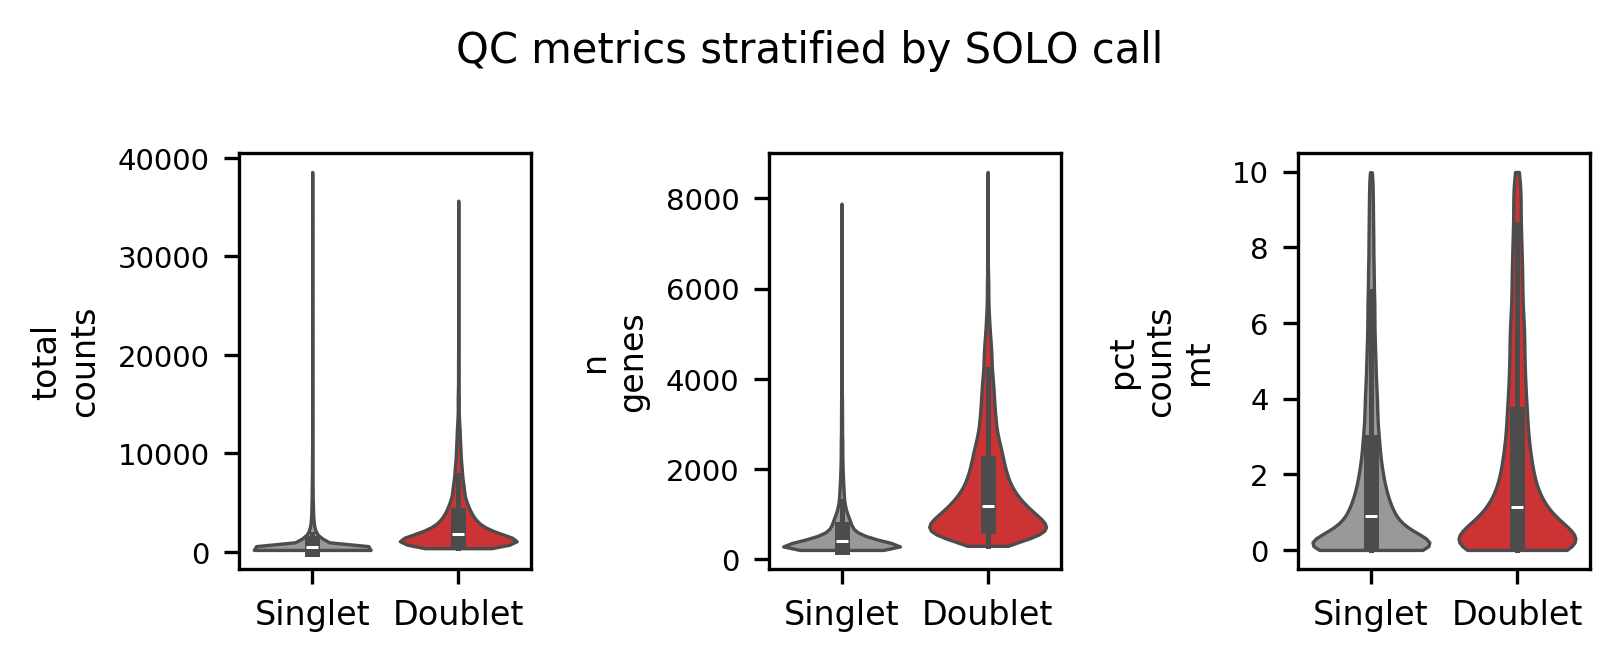

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
qc_vars = ["total_counts", "n_genes", "pct_counts_mt"]
fig, axes = plt.subplots(1, len(qc_vars), figsize=(5.5, 2.2), dpi=300, sharey=False)

for ax, var in zip(axes, qc_vars):
    sns.violinplot(
        data=adata_all.obs,
        x="solo_doublet", y=var,
        palette=["#999999", "#e41a1c"],  # grey singlet, red doublet
        cut=0, linewidth=0.8, ax=ax
    )
    ax.set_xlabel("")
    ax.set_xticklabels(["Singlet", "Doublet"], fontsize=8)
    ax.set_ylabel(var.replace("_", "\n"), fontsize=8)
    ax.tick_params(axis="y", labelsize=7)
fig.suptitle("QC metrics stratified by SOLO call", fontsize=10)
fig.tight_layout()
fig.savefig("SFig_qc_violin.pdf")


In [11]:
adata_all

AnnData object with n_obs × n_vars = 74453 × 2000
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet', 'doublet_status'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'solo_doublet_colors', 'doublet_status_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

---
## Scatter density (n_counts × n_genes) with doublets in red

Purpose – visualises how doublets occupy the high-UMI/high-gene “tail”.

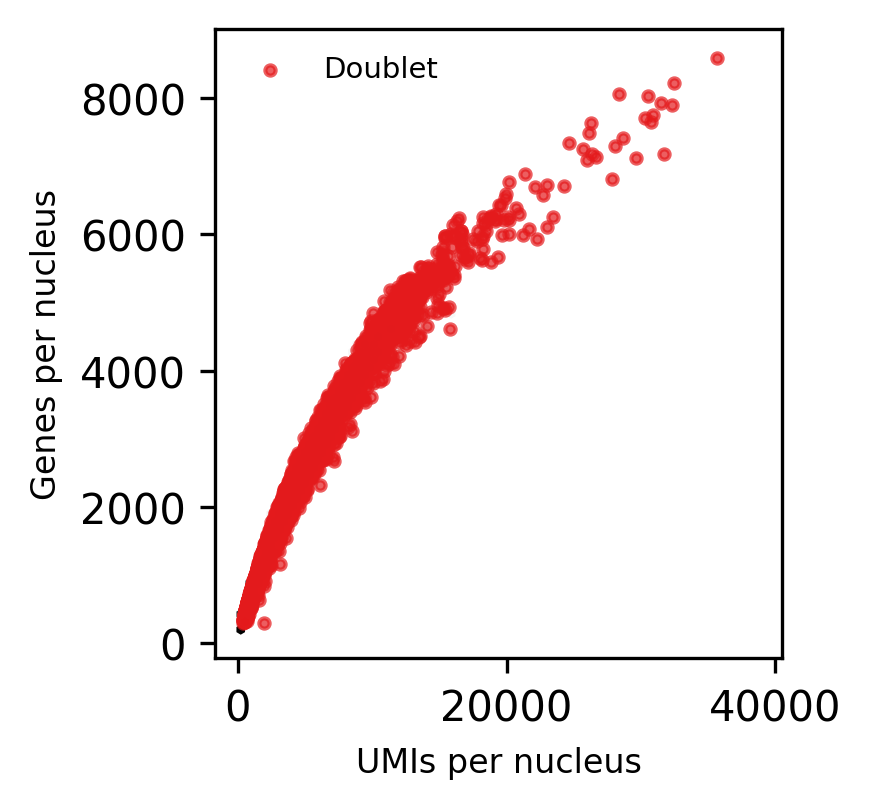

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(3.0, 2.8), dpi=300)
# background singlets
sc = ax.hexbin(
    adata_all.obs.loc[~adata_all.obs.solo_doublet, "total_counts"],
    adata_all.obs.loc[~adata_all.obs.solo_doublet, "n_genes"],
    gridsize=60, cmap="Greys", bins="log", mincnt=1, linewidth=0
)
# overlay doublets
ax.scatter(
    adata_all.obs.loc[adata_all.obs.solo_doublet, "total_counts"],
    adata_all.obs.loc[adata_all.obs.solo_doublet, "n_genes"],
    s=6, c="#e41a1c", alpha=0.7, label="Doublet"
)
ax.set_xlabel("UMIs per nucleus", fontsize=8)
ax.set_ylabel("Genes per nucleus", fontsize=8)
ax.legend(frameon=False, fontsize=7)
fig.tight_layout()
fig.savefig("SFig_hexbin_doublet.pdf")


---
## Per-cluster doublet rate bar plot

Rationale – reviewers like to see whether certain clusters are disproportionately affected.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rates = (
    adata_all.obs.groupby("cluster")["solo_doublet"]
    .mean().mul(100).sort_values(ascending=False)
)
fig, ax = plt.subplots(figsize=(3.6, 2.6), dpi=300)
rates.plot.bar(ax=ax, edgecolor="black", color="#4d79f6")
ax.set_ylabel("% doublets", fontsize=8)
ax.set_xlabel("Cluster", fontsize=8)
ax.tick_params(axis="x", labelrotation=45, labelsize=7)
ax.set_title("Doublet rate by Leiden/Louvain cluster", fontsize=10)
fig.tight_layout()
fig.savefig("SFig_cluster_doublet_rate.pdf")


---
## UMAP coloured by doublet probability (continuous)

Complementary to the binary overlay you already made; highlights “ambiguous” nuclei.

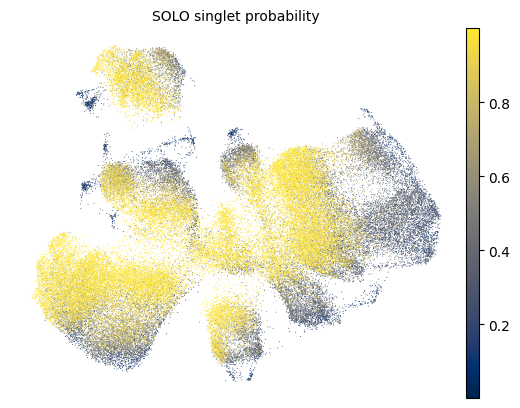

In [20]:
fig = sc.pl.umap(
    adata_all,
    color="solo_singlet",
    frameon=False,
    title=None,
    show=False,
    return_fig=True,
    color_map="cividis"
)

# Access the first Axes in the Figure
ax = fig.axes[0]

# Set title
ax.set_title("SOLO singlet probability", fontsize=10)

# Save the figure
fig.savefig("SFig_umap_prob.pdf")


In [21]:
adata_all.write("updated_adata_marked_with_doublets_after_xPCA_xUMAP.h5ad", compression="gzip")